# Importing the Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Understanding the Data

Importing Dataset

In [2]:
df = pd.read_csv('signal-data.csv')
print(df.head())

                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

In [3]:
#checking the first 20 null values occured in the dataset
df.isnull().sum().head(22)

Time     0
0        6
1        7
2       14
3       14
4       14
5       14
6       14
7        9
8        2
9        2
10       2
11       2
12       2
13       3
14       3
15       3
16       3
17       3
18       3
19      10
20       0
dtype: int64

In [4]:
#checking the dataset containing any duplicate values
df.duplicated().sum()

0

In [5]:
#checking the datatypes of the dataset
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [6]:
#checking information of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None
                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
me

In [7]:
print("Shape of dataset :", df.shape )

Shape of dataset : (1567, 592)


In [8]:
print("Column Names:")
print(df.columns.to_list())

Column Names:
['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '1

In [9]:
#Checking target variable distribution
target_col = df.columns[-1]
print("Target Column :", target_col )
print("Target Column Distribution :")
print(df[target_col].value_counts())
print("Target Column Distribution (%) :")
print(df[target_col].value_counts(normalize=True) * 100)

Target Column : Pass/Fail
Target Column Distribution :
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64
Target Column Distribution (%) :
Pass/Fail
-1    93.363114
 1     6.636886
Name: proportion, dtype: float64


In [10]:
#Drop unnamed or ID-like columns
irrelevant_cols = [col for col in df.columns if 'unnamed' in col.lower() or 'id' in col.lower()]
df.drop(columns=irrelevant_cols, inplace=True, errors='ignore')

print("Dropped Irrelevant Columns :", irrelevant_cols)
print("Final Shape :", df.shape)

Dropped Irrelevant Columns : []
Final Shape : (1567, 592)


In [11]:
#Fix label column
if df.columns[-1] not in ['label', 'target', 'Yield']:
    print("Target column detected as :", df.columns[-1])
    df.rename(columns={df.columns[-1]: 'Target'}, inplace=True)

df['Target'] = df['Target'].apply(lambda x: -1 if x == -1 else 1)

Target column detected as : Pass/Fail


# Data Visualization

Univariate, Bivariate, Multivariate Analysis

Target Value Counts :
Target
-1    1463
 1     104
Name: count, dtype: int64


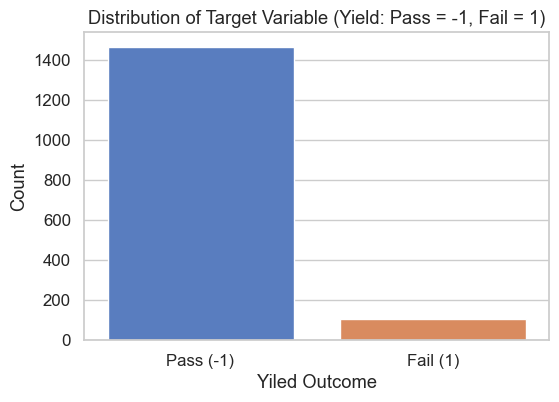

In [12]:
#set style for plotes 
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.1)

#View Target Dstribution (Pass = -1, Fail = 1)
print("Target Value Counts :")
print(df['Target'].value_counts())

#Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df)
plt.title("Distribution of Target Variable (Yield: Pass = -1, Fail = 1)")
plt.xlabel("Yiled Outcome")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['Pass (-1)', 'Fail (1)'])
plt.show()

# Summary Statistics of Features

In [13]:
summary = df.describe()
print(summary)

                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.0000

# Distribution Plots and Histogram for Selected Features

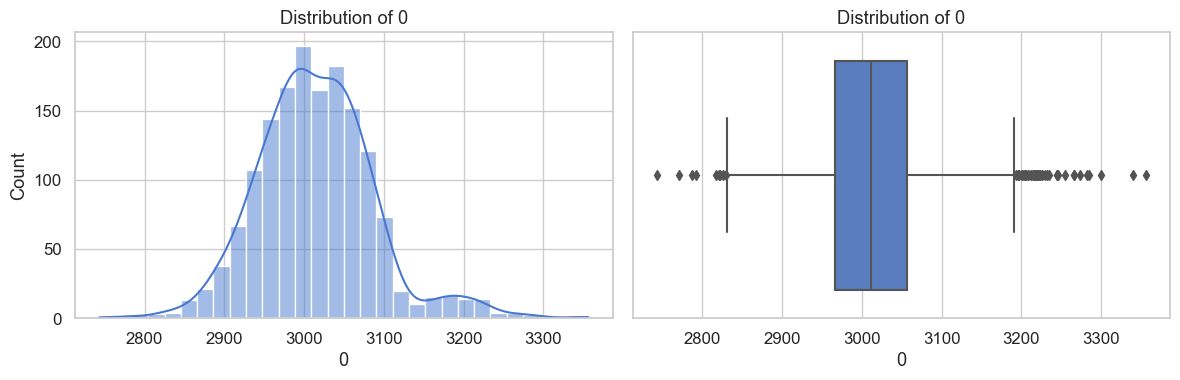

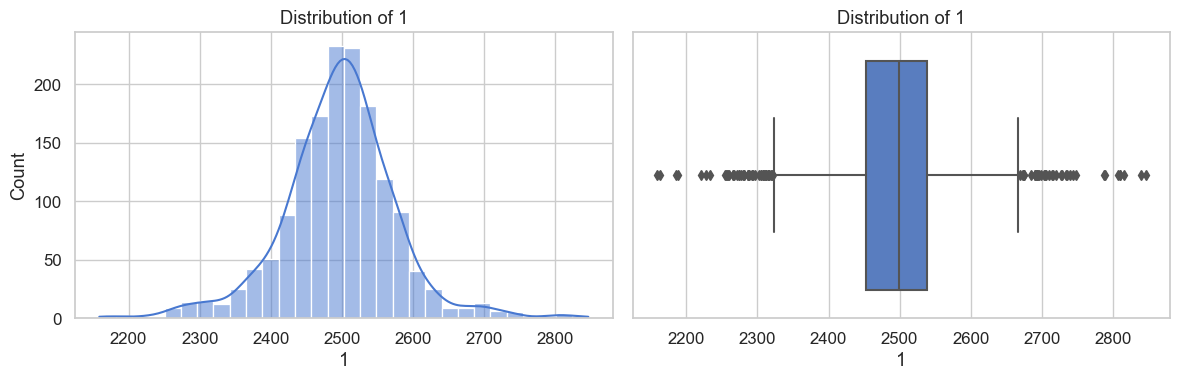

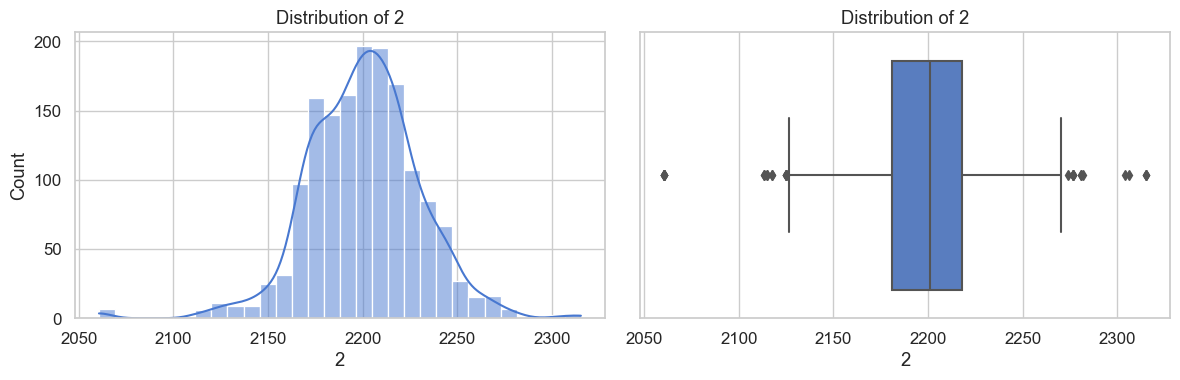

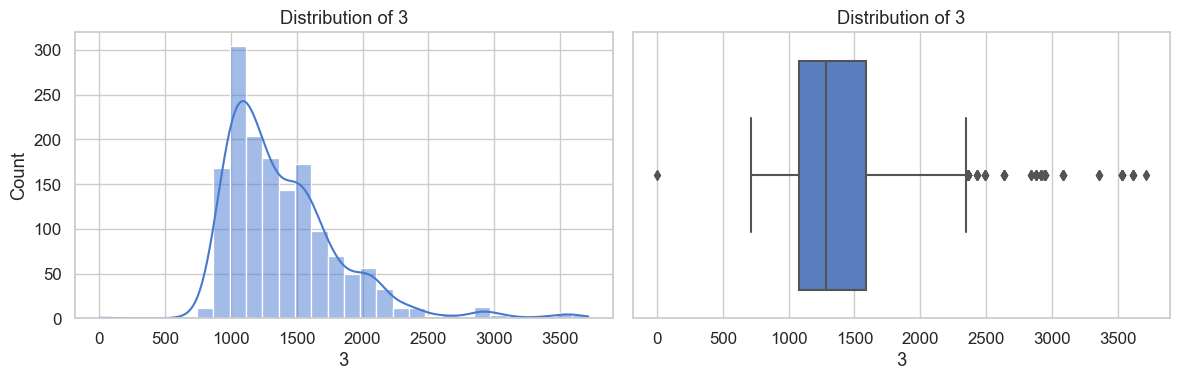

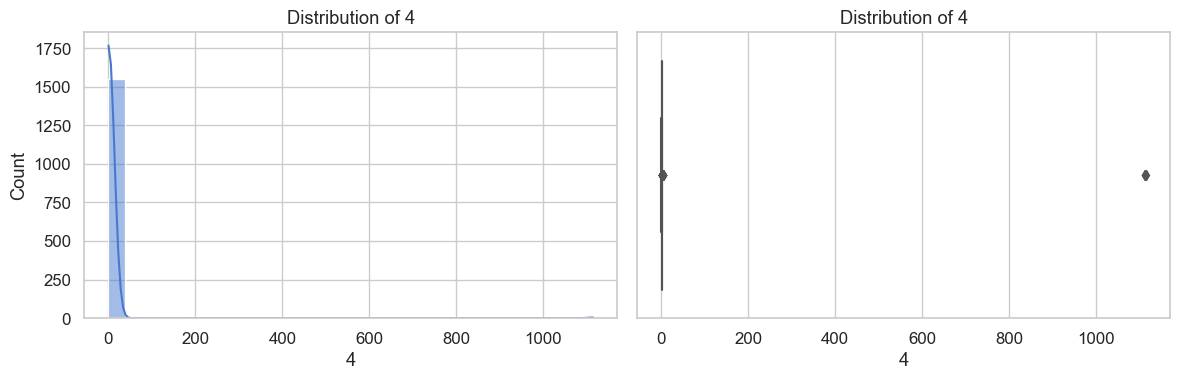

In [14]:
#Select 5 numeric features except Target
sample_features = df.drop(columns='Target').select_dtypes(include='number').columns[:5]

for features in sample_features:
    plt.figure(figsize=(12,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(df[features], bins=30, kde=True)
    plt.title(f"Distribution of {features}")

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[features])
    plt.title(f"Distribution of {features}")

    plt.tight_layout()
    plt.show()

# Statistical Summary

In [15]:
feature = sample_features[0]
print("Feature :", feature)
print("Mean :", df[feature].mean())
print("Median :", df[feature].median())
print("Min :", df[feature].min() ,"," , "Max :", df[feature].max())
print("Std Dev :", df[feature].std())
print("Skewness :", df[feature].skew())

Feature : 0
Mean : 3014.4528955797564
Median : 3011.49
Min : 2743.24 , Max : 3356.35
Std Dev : 73.62178674853077
Skewness : 0.5136566256586826


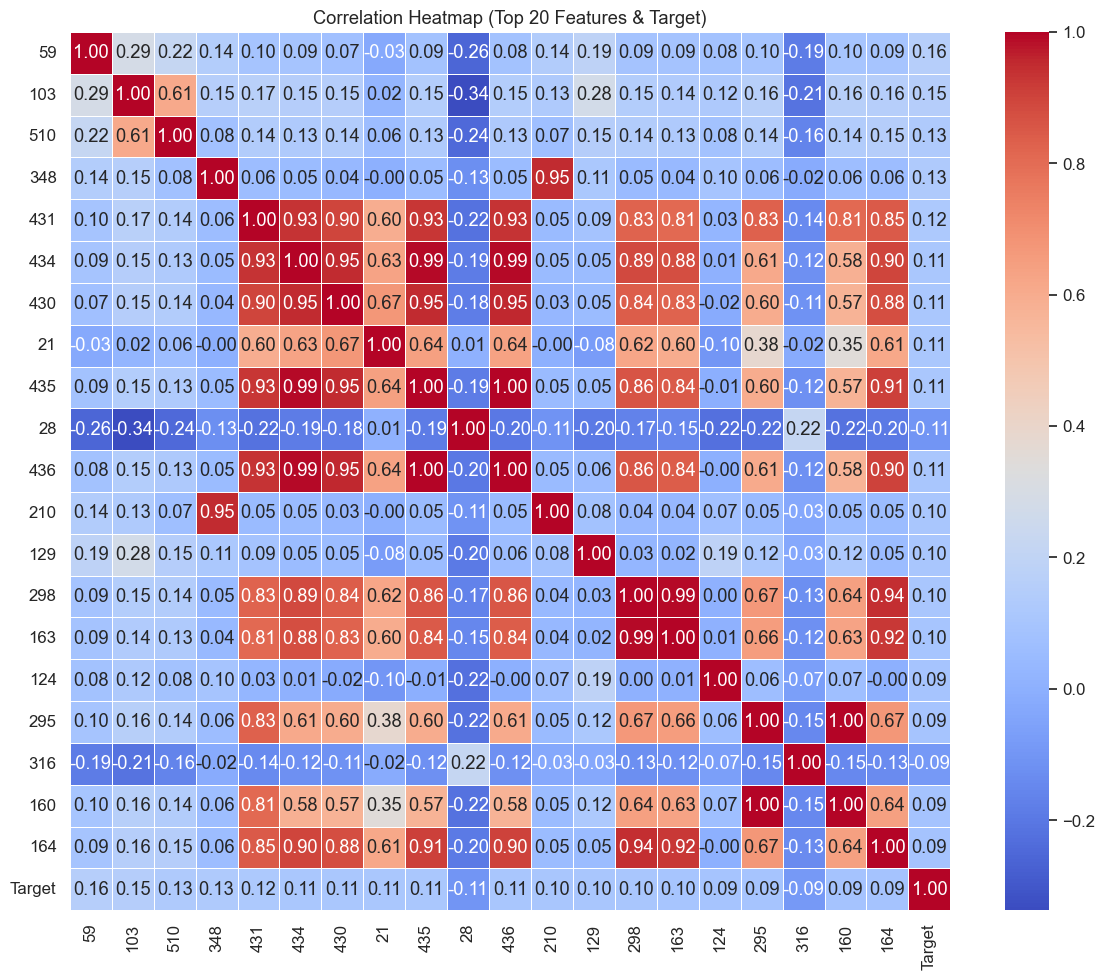

In [16]:
target_col = df.columns[-1]

df_numeric = df.select_dtypes(include=np.number).copy()
df_numeric.fillna(df_numeric.median(), inplace=True)

#Correlation with Target
feature_cols = df_numeric.columns.drop(target_col)
corr_with_target = df_numeric[feature_cols].corrwith(df_numeric[target_col]).abs()
corr_with_target = corr_with_target.sort_values(ascending=False)

#Top 20 features correlated with target
top_features = corr_with_target.head(20).index.to_list()

plt.figure(figsize=(12, 10))
sns.heatmap(
    df_numeric[top_features + [target_col]].corr(),
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Top 20 Features & Target)")
plt.tight_layout()
plt.show()



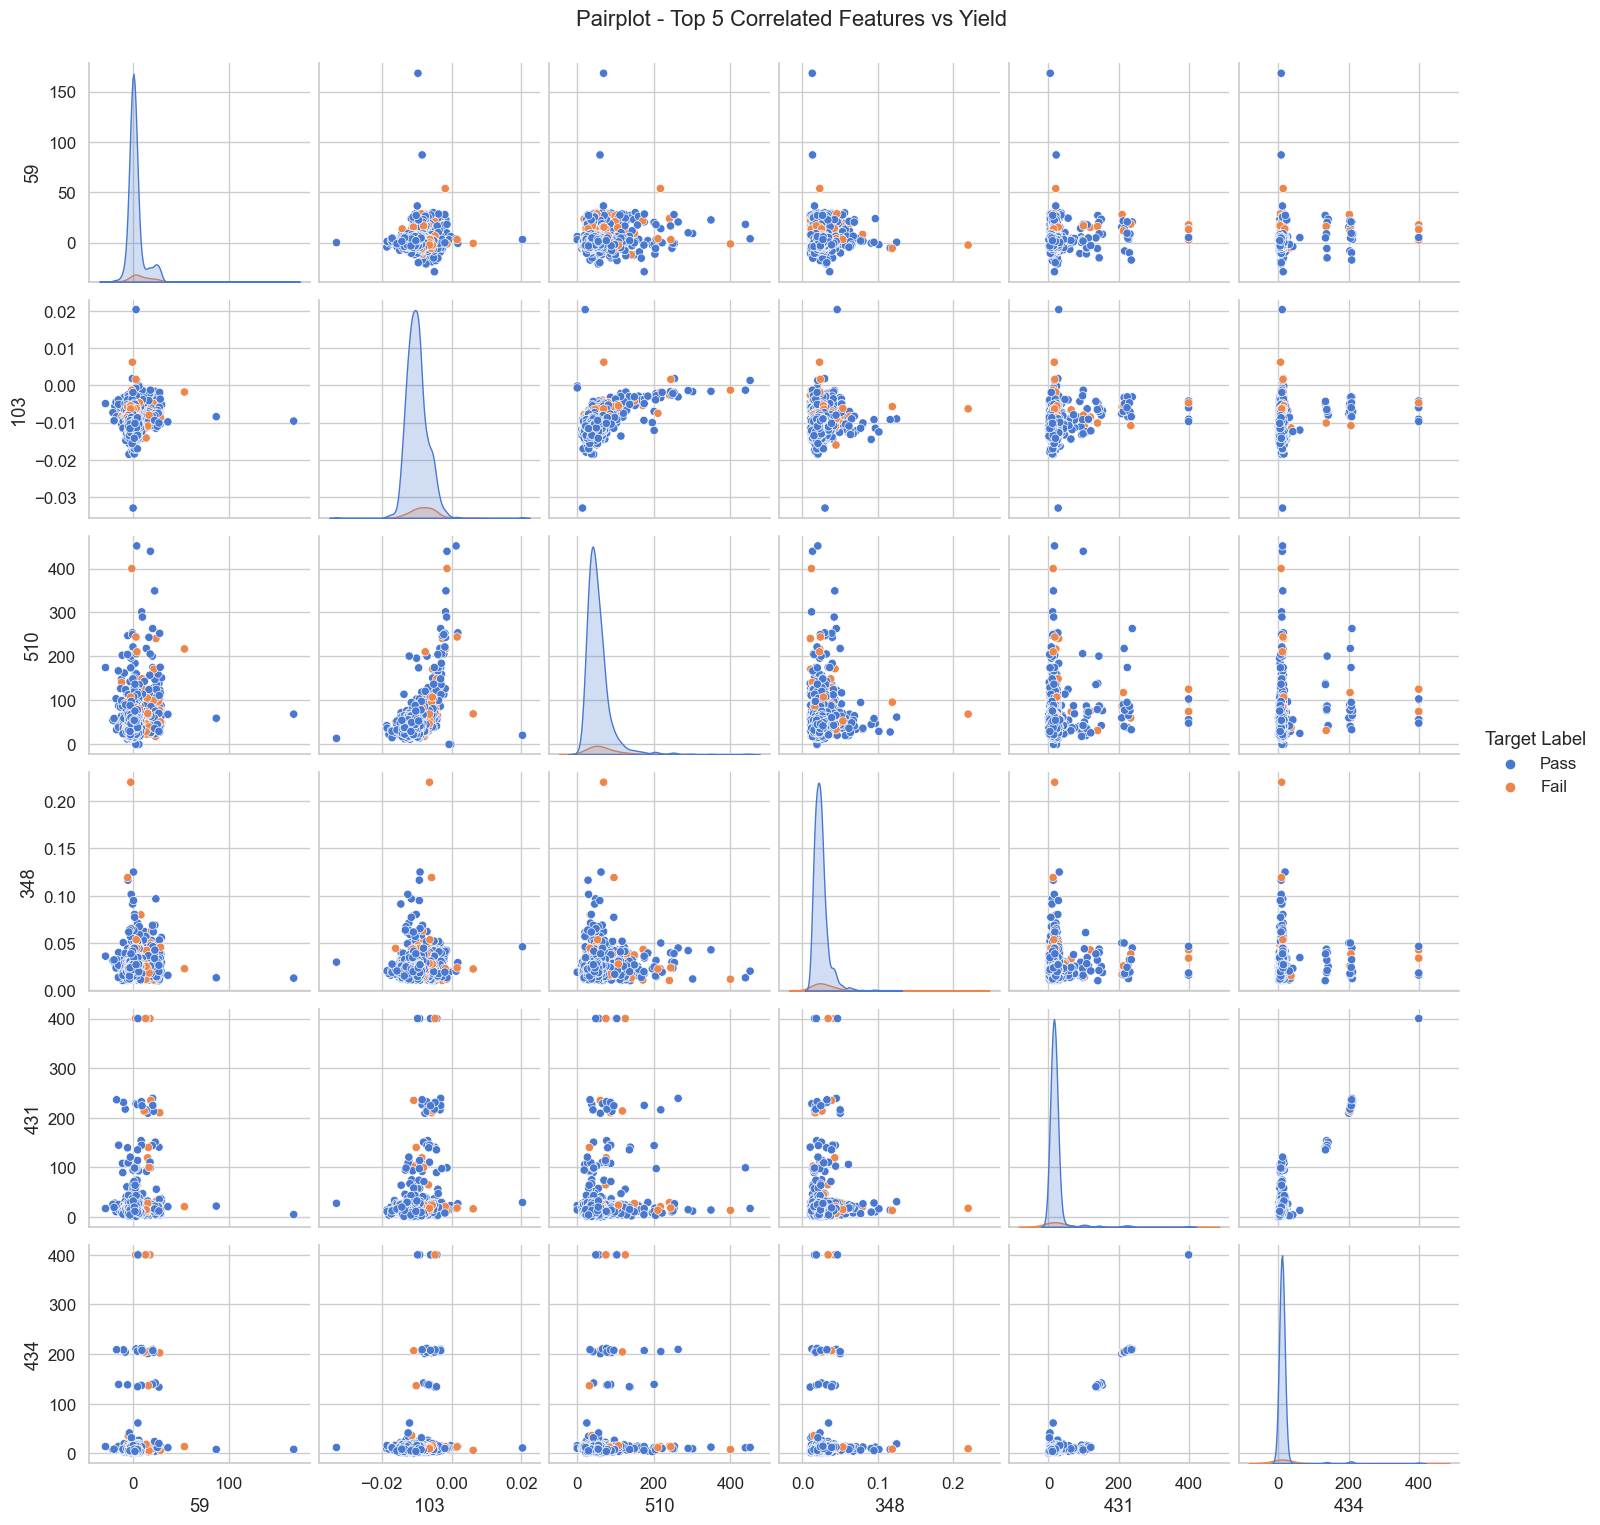

In [17]:
#Pairplot for top 5 features
pairplot_features = top_features[:20] + [target_col]
pair_df = df[pairplot_features].copy()
pair_df['Target Label'] = pair_df[target_col].map({-1: 'Pass', 1: 'Fail'}).astype(str)

sns.pairplot(pair_df, hue = 'Target Label', vars=top_features[:6])
plt.suptitle("Pairplot - Top 5 Correlated Features vs Yield", y=1.02)
plt.show()

# Check for Target Balancing

Target
-1    1463
 1     104
Name: count, dtype: int64


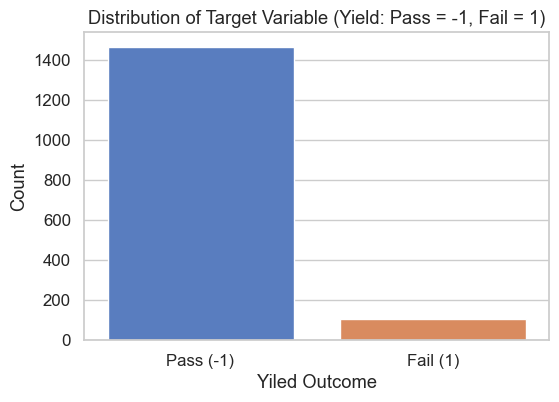

In [18]:
x = df.drop('Target', axis=1)
y = df['Target']

print(df['Target'].value_counts())

#Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df)
plt.title("Distribution of Target Variable (Yield: Pass = -1, Fail = 1)")
plt.xlabel("Yiled Outcome")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['Pass (-1)', 'Fail (1)'])
plt.show()

# Train-Test Split and Standardization

In [68]:
x = df.drop(['Target'], axis=1)
x = x.select_dtypes(include=['int64', 'float64'])

imputer = SimpleImputer(strategy='median')
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
y = df['Target']

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, random_state=42, stratify=y)

#appying SMOTE
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_train, y_train)

print("After SMOTE:", y_smote.value_counts())

print("X_train :", x_smote.shape)
print("X_test :", x_test.shape)
print("Y_train :", y_smote.shape)
print("Y_test :", y_test.shape)

After SMOTE: Target
-1    1170
 1    1170
Name: count, dtype: int64
X_train : (2340, 590)
X_test : (314, 590)
Y_train : (2340,)
Y_test : (314,)


In [49]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_smote)
x_test_scaled = scaler.transform(x_test)

print(" Standardization complete.")
print("X_train_scaled shape:", x_train_scaled.shape)
print("X_test_scaled shape :", x_test_scaled.shape)

 Standardization complete.
X_train_scaled shape: (2340, 590)
X_test_scaled shape : (314, 590)


# Model Building

Model 1 - Random Forest 

In [66]:
r_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

params = {
    "criterion" : ["gini", "entropy"], 
    "n_estimators" :[100, 150, 200, 300],
    "max_depth" : [None, 10, 20]}

# GridSearch with 3-fold CV
rf_gsv = GridSearchCV(
    r_clf, param_grid=params, 
    cv=3,
    n_jobs=1,
    verbose=1)

rf_gsv.fit(x_train_scaled, y_smote)

# Best model and parameters
print("Best Parameters are:", rf_gsv.best_params_)
print("Best CV Score:", rf_gsv.best_score_)

# Predict on test data
y_pred_rf = rf_gsv.predict(x_test_scaled)

#Evaluation
print("Accuracy Score :", accuracy_score(y_test,y_pred_rf))
print("Random Forest Classification Report (Test Set):")
print(classification_report(y_test,y_pred_rf))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters are: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}
Best CV Score: 0.9952991452991453
Accuracy Score : 0.9299363057324841
Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



Model 2 - SVM

In [64]:
svm = SVC()

params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']  # only applies to RBF
}

# GridSearch with 3-fold CV
svm_gsv = GridSearchCV(
    estimator=svm,
    param_grid=params,
    cv=3,
    n_jobs=1,
    verbose=1
)

svm_gsv.fit(x_train_scaled, y_smote)

# Best model and parameters
print("Best Parameters are:", svm_gsv.best_params_)
print("Best CV Score :", svm_gsv.best_score_)


# Predict on test data
y_pred_svm = svm_gsv.predict(x_test_scaled)

# Evaluation
print("Accuracy Score :", accuracy_score(y_test,y_pred_svm))
print("SVM Classification Report (Test Set):")
print(classification_report(y_test, y_pred_svm))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters are: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score : 0.9944444444444445
Accuracy Score : 0.9363057324840764
SVM Classification Report (Test Set):
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       293
           1       1.00      0.05      0.09        21

    accuracy                           0.94       314
   macro avg       0.97      0.52      0.53       314
weighted avg       0.94      0.94      0.91       314



Model 3 - Naive Bayes

In [62]:
nb_clf = GaussianNB()
params = {
    "var_smoothing" : [1e-9, 1e-8, 1e-7, 1e-6]}

# GridSearch with 3-fold CV
nb_gsv = GridSearchCV(
    nb_clf, 
    param_grid=params, 
    cv=3,
    n_jobs=1,
    verbose=1)

nb_gsv.fit(x_train_scaled,y_smote)

# Best model and parameters
print("Best Parameters are:", nb_gsv.best_params_)
print("Best CV Score:", nb_gsv.best_score_)

# Predict on test data
y_pred_nb = nb_gsv.predict(x_test_scaled)

#Evaluation
print("Accuracy Score :", accuracy_score(y_test,y_pred_nb))
print("Naive Bayes Classification Report (Test Set):")
print(classification_report(y_test,y_pred_nb))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters are: {'var_smoothing': 1e-06}
Best CV Score: 0.6337606837606838
Accuracy Score : 0.28343949044585987
Naive Bayes Classification Report (Test Set):
              precision    recall  f1-score   support

          -1       0.96      0.24      0.39       293
           1       0.07      0.86      0.14        21

    accuracy                           0.28       314
   macro avg       0.52      0.55      0.26       314
weighted avg       0.90      0.28      0.37       314



# Final Comparison and Model Selection

In [67]:
results = pd.DataFrame({
    'Model' : ['Random Forest', 'Naive Bayes', 'SVM'],
    'Test Accuracy' : [
        accuracy_score(y_test, rf_gsv.predict(x_test_scaled)),
        accuracy_score(y_test, nb_gsv.predict(x_test_scaled)),
        accuracy_score(y_test, svm_gsv.predict(x_test_scaled))
    ],
    'F1-Score' : [
        f1_score(y_test, rf_gsv.predict(x_test_scaled)),
        f1_score(y_test, svm_gsv.predict(x_test_scaled)),
        f1_score(y_test, nb_gsv.predict(x_test_scaled))
    ]
})

print(results)

           Model  Test Accuracy  F1-Score
0  Random Forest       0.929936  0.000000
1    Naive Bayes       0.283439  0.090909
2            SVM       0.936306  0.137931


# Final Conclusion

Objective: 

    Build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

Models Trained:

    Random Forest

    Support Vector Machine (SVM)

    Naive Bayes 

After building and evaluating:

    Best MOdel: SVM

    Best Accuracy and balanced F1 and Recall


Business Values:

    Identifies yield failure

    Supports decision making 

Limitations:

    Slow training due to high dimensionality

    Some features don't have much contribution

Improvements:

    Can use PCA if necessary

    Can use other models like BalancedRandomForest Classifier, XGBOOST